In [140]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler

In [141]:
df = fdr.DataReader('HSY', '2013-01-01', '2023-01-01') 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,72.860001,74.330002,72.540001,74.330002,58.689976,1365200
2013-01-03,74.199997,74.279999,73.269997,73.510002,58.042503,1042500
2013-01-04,73.570000,74.589996,73.480003,74.540001,58.855766,848300
2013-01-07,74.360001,74.540001,73.940002,74.459999,58.792625,943400
2013-01-08,74.379997,74.470001,73.639999,73.660004,58.160965,854000


In [142]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,234.869995,235.970001,233.820007,235.880005,232.670929,354000
2022-12-27,236.380005,237.110001,235.389999,235.729996,232.522949,497300
2022-12-28,236.419998,236.479996,232.750000,232.869995,229.701859,416800
2022-12-29,233.699997,233.960007,231.830002,233.250000,230.076691,570300
2022-12-30,233.070007,233.419998,229.830002,231.570007,228.419556,441400


In [143]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,72.860001,74.330002,72.540001,74.330002,58.689976,1365200
1,2013-01-03,74.199997,74.279999,73.269997,73.510002,58.042503,1042500
2,2013-01-04,73.570000,74.589996,73.480003,74.540001,58.855766,848300
3,2013-01-07,74.360001,74.540001,73.940002,74.459999,58.792625,943400
4,2013-01-08,74.379997,74.470001,73.639999,73.660004,58.160965,854000
...,...,...,...,...,...,...,...
2513,2022-12-23,234.869995,235.970001,233.820007,235.880005,232.670929,354000
2514,2022-12-27,236.380005,237.110001,235.389999,235.729996,232.522949,497300
2515,2022-12-28,236.419998,236.479996,232.750000,232.869995,229.701859,416800
2516,2022-12-29,233.699997,233.960007,231.830002,233.250000,230.076691,570300


In [144]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df

,Open,High,Low,Close,Volume
0,72.860001,74.330002,72.540001,74.330002,1365200
1,74.199997,74.279999,73.269997,73.510002,1042500
2,73.570000,74.589996,73.480003,74.540001,848300
3,74.360001,74.540001,73.940002,74.459999,943400
4,74.379997,74.470001,73.639999,73.660004,854000
...,...,...,...,...,...
2513,234.869995,235.970001,233.820007,235.880005,354000
2514,236.380005,237.110001,235.389999,235.729996,497300
2515,236.419998,236.479996,232.750000,232.869995,416800
2516,233.699997,233.960007,231.830002,233.250000,570300


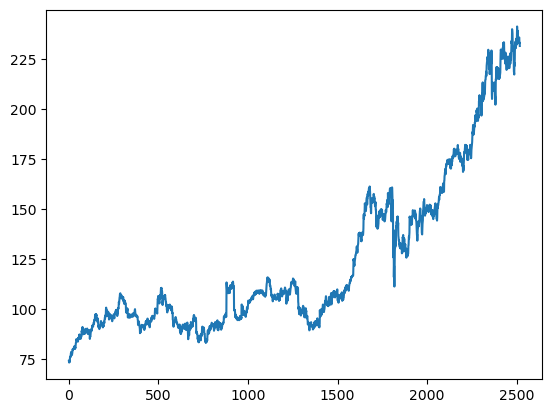

In [145]:
plt.plot(df.Close)

In [146]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    228.688800
2514    228.793700
2515    228.851299
2516    228.920400
2517    228.953200
Name: Close, Length: 2518, dtype: float64


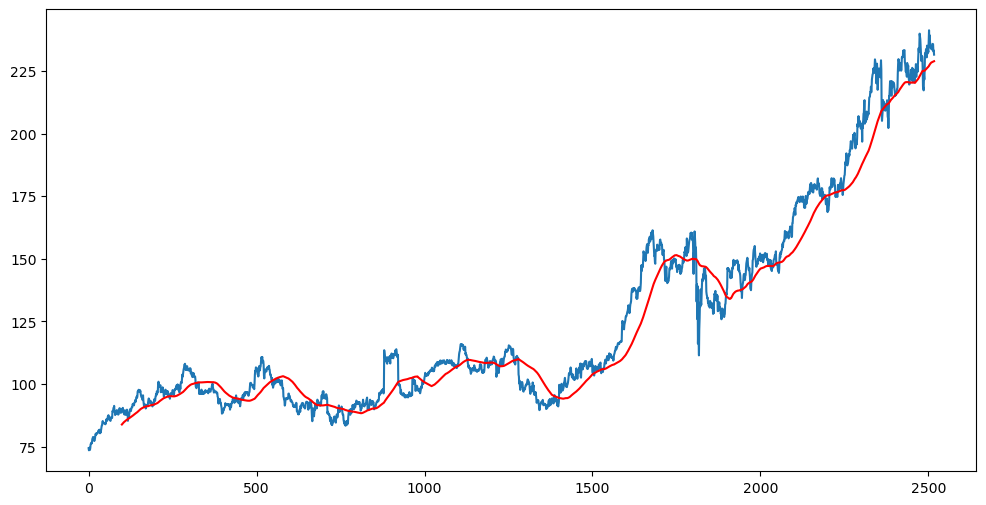

In [147]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [148]:
ma200 = df.Close.rolling(200).mean()
print(ma200)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2513    222.99090
2514    223.14610
2515    223.27690
2516    223.39905
2517    223.52840
Name: Close, Length: 2518, dtype: float64


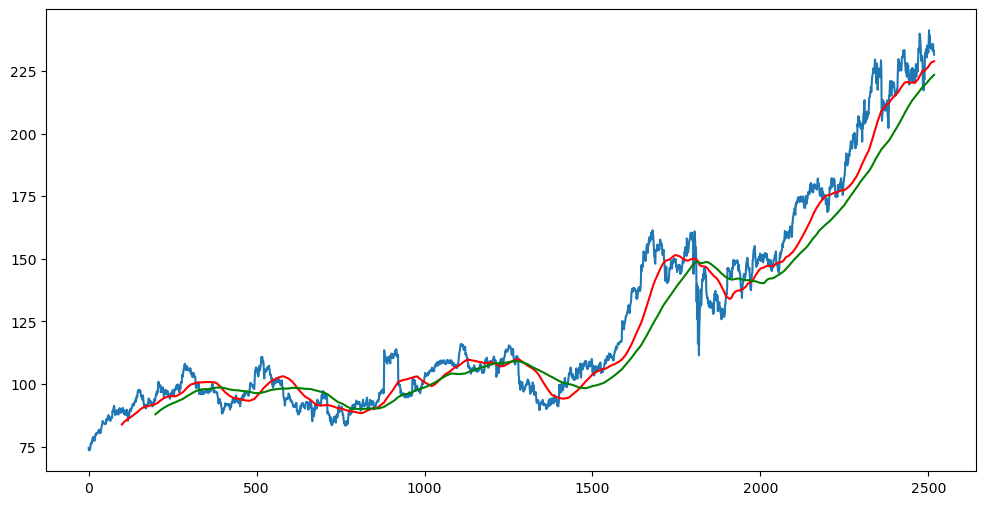

In [149]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

# Splitting data into training and testing


In [150]:
data_training = pd.DataFrame(df['Close'][0 : int(len(df) * 0.70)])
print(data_training.shape)
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])
print(data_testing.shape)

(1762, 1)
(756, 1)


In [151]:
data_training.head()

,Close
0,74.330002
1,73.510002
2,74.540001
3,74.459999
4,73.660004


In [152]:
data_testing.head()

,Close
1762,143.960007
1763,145.259995
1764,144.570007
1765,144.850006
1766,146.039993


In [153]:
scaler = MinMaxScaler(feature_range = (0,1))

In [154]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00932984],
       [0.        ],
       [0.01171918],
       ...,
       [0.8432131 ],
       [0.83411095],
       [0.83593129]])

In [155]:
data_training_array.shape

(1762, 1)

In [156]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [157]:
x_train.shape

(1662, 100, 1)

# ML Model

In [158]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 70,activation = 'relu',return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 80,activation = 'relu', input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [159]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_28 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_30 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_29 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_31 (LSTM)              (None, 100, 70)           36680     
                                                                 
 dropout_30 (Dropout)        (None, 100, 70)           0         
                                                                 
 lstm_32 (LSTM)              (None, 80)              

In [160]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 14s 163ms/step - loss: 0.0256
Epoch 2/50
52/52 [==============================] - 13s 250ms/step - loss: 0.0095
Epoch 3/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0072
Epoch 4/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0065
Epoch 5/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0062
Epoch 6/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0062
Epoch 7/50
52/52 [==============================] - 11s 220ms/step - loss: 0.0054
Epoch 8/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0055
Epoch 9/50
52/52 [==============================] - 11s 215ms/step - loss: 0.0048
Epoch 10/50
52/52 [==============================] - 11s 217ms/step - loss: 0.0050
Epoch 11/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0050
Epoch 12/50
52/52 [==============================] - 11s 220ms/step - loss: 0.0047
Epoch 13/50
5

In [161]:
model.save('keras_model.h5')

C:\Users\suddh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [162]:
data_testing.head()

,Close
1762,143.960007
1763,145.259995
1764,144.570007
1765,144.850006
1766,146.039993


In [163]:
data_training.tail()

,Close
1757,146.089996
1758,146.289993
1759,147.619995
1760,146.820007
1761,146.979996


In [165]:
past_100_days = data_training.tail(100)

In [166]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,155.479996
1,155.889999
2,155.360001
3,152.419998
4,155.500000


In [167]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.3391592 ],
       [0.34231598],
       [0.33823531],
       [0.315599  ],
       [0.33931322],
       [0.33885127],
       [0.35679092],
       [0.34685861],
       [0.36433632],
       [0.36148757],
       [0.35109331],
       [0.36664616],
       [0.36918699],
       [0.37765627],
       [0.3584848 ],
       [0.36225744],
       [0.37342157],
       [0.38473972],
       [0.37627043],
       [0.36610715],
       [0.34431779],
       [0.3165229 ],
       [0.30582072],
       [0.30666766],
       [0.28595633],
       [0.28187553],
       [0.31767788],
       [0.32044967],
       [0.32352939],
       [0.32730215],
       [0.32245148],
       [0.34054515],
       [0.32291343],
       [0.32991992],
       [0.32607022],
       [0.33538655],
       [0.33461657],
       [0.32429938],
       [0.3391592 ],
       [0.354789  ],
       [0.35625191],
       [0.34531875],
       [0.34678166],
       [0.34547277],
       [0.33785031],
       [0.33838933],
       [0.3165229 ],
       [0.308

In [168]:
input_data.shape

(856, 1)

In [169]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])   

In [170]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [171]:
y_predicted = model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 2s 43ms/step


(756, 1)

In [172]:
y_test

array([0.25046202, 0.26047117, 0.25515867, 0.25731449, 0.2664767 ,
       0.2705575 , 0.28256857, 0.29457963, 0.28795814, 0.28549427,
       0.28903605, 0.30351098, 0.31875579, 0.31575302, 0.32645521,
       0.33299964, 0.31890981, 0.31382817, 0.30582072, 0.35963967,
       0.3367724 , 0.33276867, 0.31575302, 0.31914079, 0.33038187,
       0.34354792, 0.35078538, 0.35586691, 0.35748384, 0.36880199,
       0.37657836, 0.37442253, 0.37773334, 0.37480753, 0.37642445,
       0.36579922, 0.35332621, 0.36148757, 0.31205734, 0.25069299,
       0.31513706, 0.32383743, 0.38127501, 0.36626117, 0.3453957 ,
       0.30466585, 0.3319988 , 0.28749619, 0.16507542, 0.21874035,
       0.11164152, 0.21304286, 0.03603327, 0.07976595, 0.04850634,
       0.        , 0.08076685, 0.11325839, 0.16184168, 0.14944561,
       0.20287958, 0.16222667, 0.1557592 , 0.18709575, 0.21820145,
       0.23429321, 0.22851864, 0.24083775, 0.25007703, 0.24037569,
       0.26716974, 0.23999081, 0.26193407, 0.26971056, 0.25523

In [173]:
y_predicted

array([[0.2532256 ],
       [0.25393483],
       [0.25380522],
       [0.25274402],
       [0.25098956],
       [0.24917859],
       [0.24793474],
       [0.24798283],
       [0.25000986],
       [0.25383404],
       [0.25867575],
       [0.26379734],
       [0.26909834],
       [0.274948  ],
       [0.2812754 ],
       [0.2880182 ],
       [0.29506832],
       [0.30164683],
       [0.30684203],
       [0.3099055 ],
       [0.31243145],
       [0.3149831 ],
       [0.31743866],
       [0.3189476 ],
       [0.31909233],
       [0.31828368],
       [0.31750774],
       [0.31771538],
       [0.3194344 ],
       [0.32262373],
       [0.32720044],
       [0.33297187],
       [0.33936745],
       [0.34577674],
       [0.35153466],
       [0.3562269 ],
       [0.35930645],
       [0.36016834],
       [0.3590432 ],
       [0.35488415],
       [0.34608492],
       [0.33418053],
       [0.32155663],
       [0.31221902],
       [0.30829197],
       [0.3090831 ],
       [0.31144524],
       [0.313

In [174]:
scaler.scale_

array([0.00769941])

In [175]:
scale_factor= 1/0.00769941
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

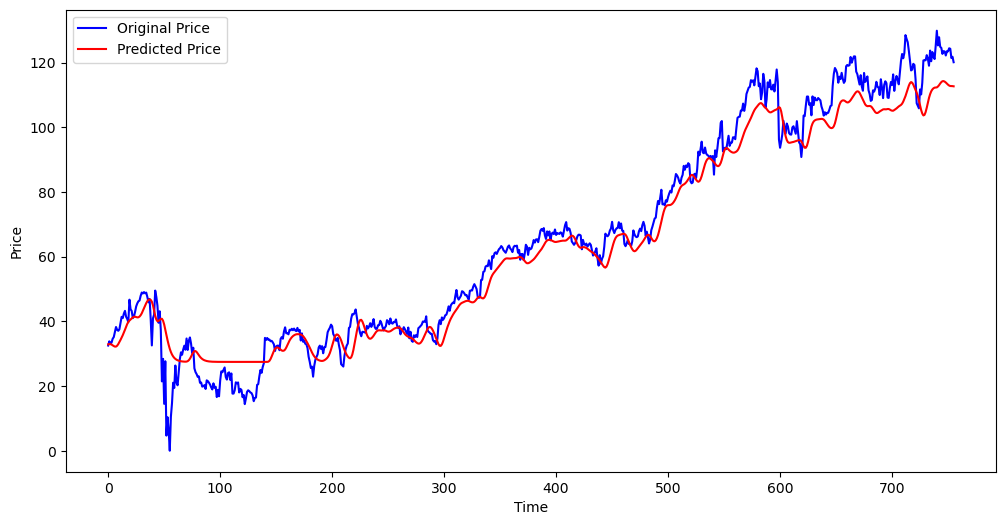

In [176]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label= 'Original Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()